# Analyzing a Transmon circuit

This notebook is a modified version of a homework that was handed in by me and another student at the Technical university of Delft. The goal is to analyze a transmon circuit using the bbq (black-box quantization) recipe - both mathematically and using python (especially QuCAT and QUTip).  

All recipes and equations were derived in the lectures, our contribution is solving the homeworks and implementing the code. 





$$a)$$ | $$b)$$
- | - 
![Image](images/circuit1.png) | ![alt](images/circuit2.png)



# PART I: Theory

Focus on circuit $a)$ and replace the josephson junction (JJ) with an equal inductance inductor and let's write the resulting admittance at the $L_j$ node: 

#### EE Basics:

For this we will need some basic circuit theory rules: 

$$ Y_R = \frac{1}{R}, \quad Y_L = \frac{1}{i\omega L}, \quad Y_C = i\omega C $$



$$ \text{Series: } \quad  \frac{1}{Y_T} = \frac{1}{Y_1} + \frac{1}{Y_2}, \quad \text{Parallel: } Y_T = Y_1 + Y_2. $$


#### QM Basics:
Furthermore some basic rules from Quantum mechanics for 

creation operator: $a^{\dagger }\mid \!n\rangle ={\sqrt {n+1}}\mid \!n+1\rangle, \quad $

annihilation operator: $ a\mid \!n\rangle ={\sqrt {n}}\ |n-1\rangle, \quad $ 

number operator:  $ \hat{n}=a^\dagger a|n\rangle = n |n\rangle .$




### a) Finding the Admittance Y

Applying all these rules we find $Y$ to be, 

$$ Y = -i \frac{1 - \omega^2 CL_s}{(1-\omega^2 LC)\omega L_j},  $$
where $L_s = L + L_j.$


### b) Finding the resonance fequency $\omega_n$

Using the fact that the resonance frequency is the frequency where $Y(\omega_n) = 0$, and since we have already written our $Y$ in $a)$ in ration form we just need to solve 




\begin{align*} 
1 - &\omega^2 CL_s = 0 \\
\Leftrightarrow &\omega_m = \frac{1}{\sqrt{L_s C}}
\end{align*}

### c) Finding the effective capacitance $C_m$

To find the effective capacitance we first need to evaluate the derivative of our admittance and evaluate it at $\omega = \omega_m$:
$$ C_m = \frac{1}{2}\cdot \mathrm{Im}[Y'(\omega = \omega_m)] = C \left(\frac{L_s}{L_j}\right)^2$$


### d) Hamiltonian with cosine term
we write the Hamiltonian with the cosine term and the creation/an. terms

$$ H = \hbar \omega_m a^\dagger_m a_m + E_J\left[ 1 - \cos (\varphi_{\mathrm{ZPF}}(a_m + a_m^\dagger))   -   \frac{\varphi^2_{\mathrm{ZPF}}}{2}\left(a_m + a^\dagger_m\right)^2  \right]$$


where we define $\varphi_{\mathrm{ZPF}}= \frac{1}{\phi_0}\sqrt{\frac{\hbar}{2\omega_m C_m}}$



### e) Hamiltonian with expanded cosine term
Next, let's expand the cosine term to fourth order and ignoring all diagonal terms 

$$ H = \omega_m  $$ 



# PART II: Python - QuCAT

In [7]:
import scipy.constants
import numpy as np
import matplotlib.pyplot as plt
from qucat import Network,GUI,L,J,C,R
import pandas as pd

### a) Drawing the circuit

Next step is to draw the diagram via the GUI or programmatically. It will be stored in the folder circuits 

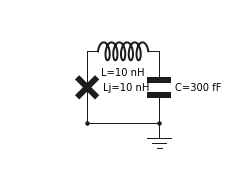

J 0 1 Lj=10 nH
C 0 2 C=300 fF
L 1 2 L=10 nH




,ω,Anharmonicity
0,[2054681480.2049992],[8070928.8862714665]


In [17]:
cir = GUI('circuits/basics.txt', # location of the circuit file
edit=True, # open the GUI to edit the circuit
plot=True, # plot the circuit after having edited it
print_network=True # print the network
)

data = pd.DataFrame(data={'\u03C9':[cir.eigenfrequencies()], 'Anharmonicity':[cir.anharmonicities()]})
data

### b) Calculating 


Let's look at the first $3 - \mathrm{lvl's}$ of the qubit. For this we want to construct the hamiltonian from our circuit (using "cir.hamiltonian")  and then calculate the eigenenergies (using ".eigenenergies"). We compare this to the values we obtained analytically 

In [9]:
H = cir.hamiltonian() #Construct the Hamiltonian matrix
e = H.eigenenergies() #calculate the Eigen energies of the hamiltonian (in Hz)
de = [e[1]-e[0],e[2]-e[1]] #calculate the difference between the three energy levels (in Hz)
data2 = pd.DataFrame(data={'E01':[de[0]],'E12':[de[1]]})
print(data2)

            E01           E12
0  2.046546e+09  2.038360e+09


### seond circuit


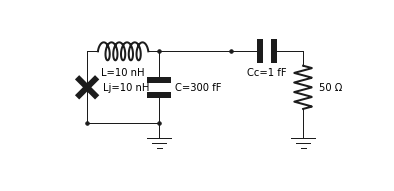

J 0 2 Lj=10 nH
C 0 1 C=300 fF
L 1 2 L=10 nH
C 1 3 Cc=1 fF
R 0 3 50 Ohm


loss rate =[4391.64241164]


In [21]:
cir2 = GUI('circuits/basics2.txt', # location of the circuit file
edit=True, # open the GUI to edit the circuit
plot=True, # plot the circuit after having edited it
print_network=True # print the network
)
loss = cir2.loss_rates()
print('loss rate ='+str(loss))